## Import

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Processing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 43119 files belonging to 4 classes.


### Validation Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 8850 files belonging to 4 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print (x,x.shape)
    print (y,y.shape)
    break

tf.Tensor(
[[[[  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   ...
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]]

  [[  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   ...
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]]

  [[  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   ...
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]]

  ...

  [[  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   ...
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [ 

## Building Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Input, Flatten, Dropout

In [7]:
model = Sequential()

In [8]:
## Building Convolution Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

/opt/anaconda3/envs/tf-macos/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=256,activation='relu'))

In [16]:
model.add(Dropout(0.5))

In [17]:
#Output Layer
model.add(Dense(units=4,activation='softmax'))

## Compilling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,598,510 (40.43 MB)

 Trainable params: 3,532,836 (13.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,065,674 (26.95 MB)

## Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


I0000 00:00:1758601958.718406 4695208 service.cc:145] XLA service 0x600002264300 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758601958.719068 4695208 service.cc:153]   StreamExecutor device (0): Host, Default Version
2025-09-23 11:32:38.791859: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1758601959.846237 4695208 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1946s 1s/step - accuracy: 0.4950 - loss: 1.1986 - val_accuracy: 0.6713 - val_loss: 0.8346
Epoch 2/10
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 4218s 3s/step - accuracy: 0.7243 - loss: 0.6879 - val_accuracy: 0.7877 - val_loss: 0.5695
Epoch 3/10
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 2841s 2s/step - accuracy: 0.8233 - loss: 0.4671 - val_accuracy: 0.8532 - val_loss: 0.3893
Epoch 4/10
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1951s 1s/step - accuracy: 0.8794 - loss: 0.3235 - val_accuracy: 0.8934 - val_loss: 0.3063
Epoch 5/10
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1904s 1s/step - accuracy: 0.9201 - loss: 0.2266 - val_accuracy: 0.9050 - val_loss: 0.2730
Epoch 6/10
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 2494s 2s/step - accuracy: 0.9413 - loss: 0.1641 - val_accuracy: 0.8976 - val_loss: 0.3247
Epoch 7/10
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1917s 1s/step - accuracy: 0.9571 - loss: 0.1181 - val_accuracy: 0.8711 - val_loss: 0.3716
Epoch 8/10
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 3640s 3s/step - accuracy: 0.9626 - loss: 0.10

## Model Evaluation

In [23]:
#Model Evaluation on Training Set
train_loss,train_acc = model.evaluate(training_set)

1348/1348 ━━━━━━━━━━━━━━━━━━━━ 450s 334ms/step - accuracy: 0.9846 - loss: 0.0431


In [24]:
print(train_loss,train_acc)

0.038851164281368256 0.9865952134132385


In [25]:
#Model Evaluation on Validation Set
val_loss,val_acc = model.evaluate(validation_set)

277/277 ━━━━━━━━━━━━━━━━━━━━ 77s 278ms/step - accuracy: 0.9251 - loss: 0.2633


In [26]:
print(val_loss,val_acc)

0.2448716163635254 0.9290395379066467


### Saving Model

In [28]:
model.save("trained_model.keras")

In [4]:
training_history.history

NameError: name 'training_history' is not defined

In [30]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Model Evaluation

### Accuracy Visualization

In [2]:
import matplotlib.pyplot as plt

In [3]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Akurasi Pelatihan')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Akurasi Validasi')
plt.xlabel("Banyak Pengulangan")
plt.ylabel("Hasil Akurasi")
plt.title("Visualisasi Hasil Akurasi")
plt.legend()
plt.show()

NameError: name 'training_history' is not defined

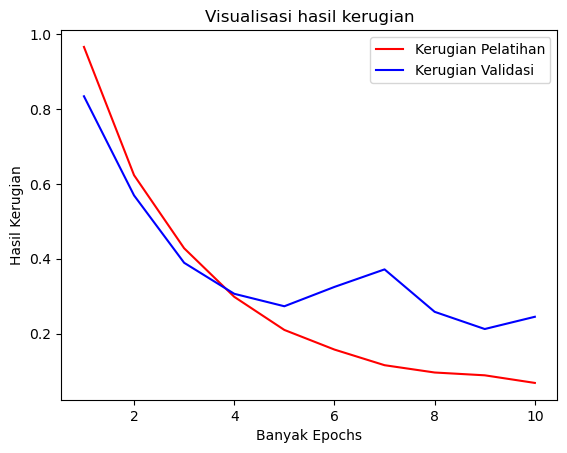

In [39]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['loss'], color='red', label='Kerugian Pelatihan')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Kerugian Validasi')
plt.xlabel("Banyak Pengulangan")
plt.ylabel("Hasil Kerugian")
plt.title("Visualisasi hasil kerugian")
plt.legend()
plt.show()

### Other Metrics for model evaluation

In [53]:
class_name = validation_set.class_names

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 8850 files belonging to 4 classes.


In [43]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

277/277 ━━━━━━━━━━━━━━━━━━━━ 74s 263ms/step


(array([[9.4079036e-01, 6.7085624e-05, 1.6444084e-05, 5.9126128e-02],
        [9.6949881e-01, 1.8884855e-05, 7.2841290e-06, 3.0475037e-02],
        [9.9964249e-01, 9.4310322e-05, 2.1887819e-04, 4.4310575e-05],
        ...,
        [1.9571219e-29, 8.9513372e-30, 1.0083210e-28, 1.0000000e+00],
        [3.3113237e-18, 3.4595021e-27, 2.8623380e-24, 1.0000000e+00],
        [1.5861180e-01, 6.5921357e-09, 1.5023852e-18, 8.4138817e-01]],
       dtype=float32),
 (8850, 4))

In [44]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [45]:
predicted_categories

<tf.Tensor: shape=(8850,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [47]:
true_categories = tf.concat([y for x,y in test_set],axis = 0)
true_categories

2025-09-24 07:35:31.174661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(8850, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [48]:
Y_true = tf.argmax(true_categories, axis=1)

In [49]:
Y_true

<tf.Tensor: shape=(8850,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [50]:
# Precision Recall Fscore

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                precision    recall  f1-score   support

   Corynespora       0.92      0.99      0.95      2206
       Healthy       0.90      0.95      0.92      2289
        Oidium       0.96      0.88      0.92      2192
Pestalotiopsis       0.94      0.90      0.92      2163

      accuracy                           0.93      8850
     macro avg       0.93      0.93      0.93      8850
  weighted avg       0.93      0.93      0.93      8850



### Confusion Matrix Visualization

In [56]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[2175,   10,    0,   21],
       [  53, 2165,   54,   17],
       [  29,  149, 1934,   80],
       [ 113,   75,   27, 1948]])

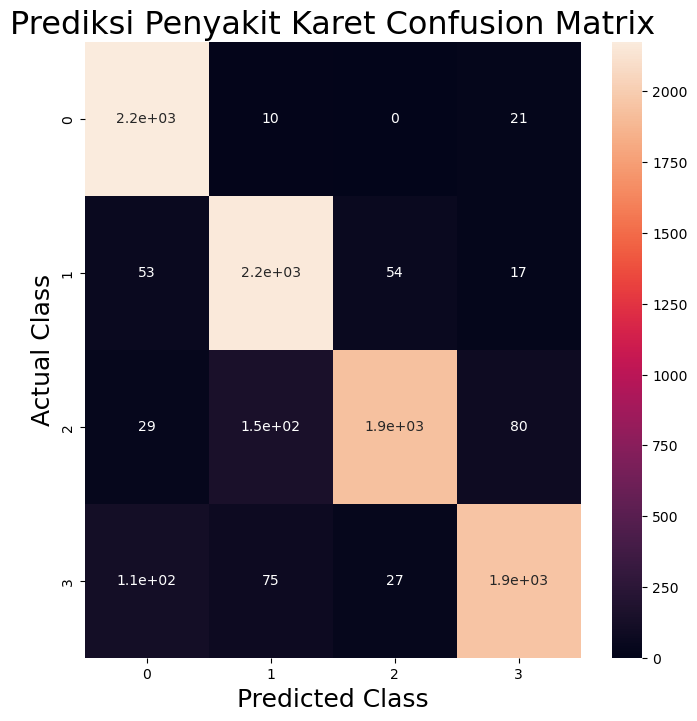

In [64]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Class", fontsize = 18)
plt.ylabel("Actual Class", fontsize = 18)
plt.title("Prediksi Penyakit Karet Confusion Matrix", fontsize = 23)
plt.show()